what fibbonacci number do you want to calculate? 10


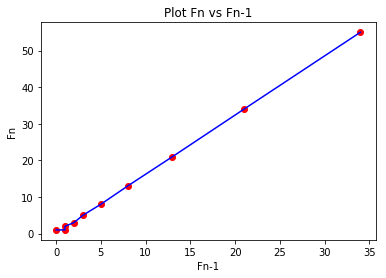

In [39]:
#Kevin Parrish, Computational Physics, Section PHYS-404
#Question 1
import pylab as graph
def memorizationMethod(n, table): #creates the recursive function
    if n == 0 or n==1:  
        table[n]=n  #creates the base cases for the first and second terms of the fibonacci sequence
    if table[n] is None: 
        table[n] = memorizationMethod(n-1, table) + memorizationMethod(n-2, table) ## stores the next fibonacci value into the table
    return table[n]
n=input('what fibbonacci number do you want to calculate? ') #stores the value of n
n=int(n) #converts n into an integer
table =[None]*(n+1) #create the table with variable n spots
fnplot=[None]*(n+1) #creates the y and x axis
fn_1plot=[None]*(n+1)
for i in range (1,n+1): #fills the x and y value list
    fnplot[i]=memorizationMethod(i,table)
    fn_1plot[i]=memorizationMethod(i-1, table)
graph.plot(fn_1plot,fnplot,'ro') #plots the exact points
graph.plot(fn_1plot,fnplot,'b') #connects the points by a line
graph.title('Plot Fn vs Fn-1')
graph.ylabel('Fn')
graph.xlabel('Fn-1')
graph.show()

In [33]:
#Question 2a
def iterationMethod(n): #This method calls on the recursive function for every calculation
    if n==0:
        return 0
    elif n==1:
        return 1
    else: 
        return iterationMethod(n-1)+iterationMethod(n-2)

def tabulationMethod(n): #This method stores the calculated values into an array
    table=[None]*(n+1)
    table[0]=0
    table[1]=1
    
    for i in range(2,n+1):
        table[i]=table[i-1]+table[i-2]
    return table[n]

def arrpow(arr, n): # calculate 2x2 array to the nth power.
    yarr=arr #I'm not sure how the matrix method works, so I just used the example from the class.
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]], # array multiply itself
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:   # if n is an odd number, multiple another arr
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def matrixMethod(n):   # the fastest method
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]  #0 0 component is Fn#
    return f


import time #The three chunks of code here just calculates the fibonacci values for different values
nValues=[32,33,35,38,40] #of n, and then it writes it to a file. I chose appropriate n values to get
file='iterationMethod'   #reasonable times
for i in range(0,5):
    with open(file, 'a') as f:
        f.write(str(nValues[i]) + '\n')
        start_time=time.time()
        x=iterationMethod(nValues[i])
        f.write(str(time.time() - start_time)+'\n')
print('done')

import time
nValues=[50000,100000,150000,200000,300000]
file='tabulationMethod'
for i in range(0,5):
    with open(file, 'a') as f:
        f.write(str(nValues[i]) + '\n')
        start_time=time.time()
        x=tabulationMethod(nValues[i])
        f.write(str(time.time() - start_time)+'\n')
print('done')        
        
import time
nValues=[1000000,2000000,3000000,4000000,5000000]
file='matrixMethod'
for i in range(0,5):
    with open(file, 'a') as f:
        f.write(str(nValues[i]) + '\n')
        start_time=time.time()
        x=matrixMethod(nValues[i])
        f.write(str(time.time() - start_time)+'\n')
print('done')
    


done


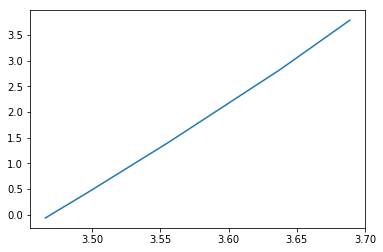

In [38]:
#Question 2b
#these three chunks of code takes the file that was created and plots log(values)
with open('iterationMethod') as f:
    arr=[]
    for line in f.readlines(): 
        arr.append(line) #stores all the values in list arr
    nList=[]
    timeList=[]
    for i in range (0,len(arr)):
        if i%2==0:
            nList.append(math.log(int(arr[i]))) #collects the n values
        else:
            timeList.append(math.log(float(arr[i]))) #collects the time values
import pylab as graph
import math
graph.plot(nList,timeList) #plots the graph
graph.show()


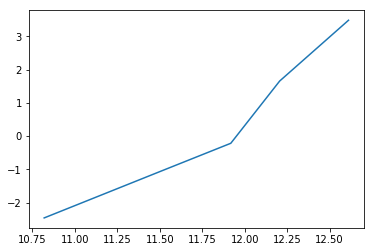

In [37]:
with open('tabulationMethod') as f:
    arr=[]
    for line in f.readlines():
        arr.append(line)
    nList=[]
    timeList=[]
    for i in range (0,len(arr)):
        if i%2==0:
            nList.append(math.log(int(arr[i])))
        else:
            timeList.append(math.log(float(arr[i])))
import pylab as graph
graph.plot(nList,timeList)
graph.show()
            
           

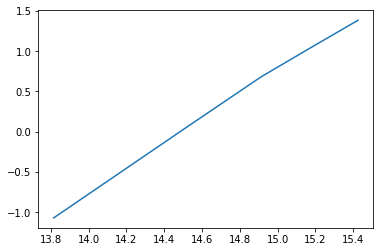

In [31]:
with open('matrixMethod') as f:
    arr=[]
    for line in f.readlines():
        arr.append(line)
    nList=[]
    timeList=[]
    for i in range (0,len(arr)):
        if i%2==0:
            nList.append(math.log(int(arr[i])))
        else:
            timeList.append(math.log(float(arr[i])))
import pylab as graph
graph.plot(nList,timeList)
graph.show()
            
           